# 特征工程

特征工程是数据预处理的重要组成部分，它涉及从原始数据中提取、构建、选择和转换特征，以便更好地呈现数据背后的潜在规律。

1. **特征提取**（Feature Extraction）
- 文本数据：从文本评论中提取关键词、词袋模型或TF-IDF特征。
- 图像数据：从图像中提取颜色直方图、边缘检测特征或深度学习中的卷积神经网络特征。
- 音频数据：从音频信号中提取梅尔频率倒谱系数（MFCC）或语谱图等声学特征。
2. **特征转换**（Feature Transformation）
- 对数变换：将数据取对数，用于处理偏态分布的数据。
- 标准化：将数据缩放到均值为0、标准差为1的标准正态分布。
- 归一化：将数据缩放到特定的范围，通常是[0, 1]或[-1, 1]。
3. **特征选择**（Feature Selection）
- 过滤法：使用统计方法（如方差、相关系数）来选择最相关的特征。
- 包装法：使用机器学习模型来评估不同特征子集的性能，如递归特征消除（Recursive Feature Elimination）。
- 嵌入法：通过在模型中内置特征选择过程，如L1正则化的逻辑回归。







<br></br>
    <img width="342" alt="image" src="https://github.com/hypertrons/hypertrons-crx/assets/50283262/78e284de-21d1-43dc-8de1-241a33afb841">
    <img width="373" alt="image" src="https://github.com/hypertrons/hypertrons-crx/assets/50283262/a925b2b6-3f4a-4236-98ee-b7879c0b86b4">

## 特征选择

特征选择算法是从原始数据中选择一部分重要的特征，用于构建机器学习模型，以达到减少维度、提高模型性能、避免过拟合等目的。

特征选择通过以下方式实现：

- 过滤法（Filter Methods）：过滤法使用统计方法或相关性度量来评估每个特征与目标变量之间的关系，并基于这些评估选择特征。常见的过滤法包括卡方检验、相关系数、方差分析（ANOVA）等。过滤法是一种快速的特征选择方法，但它们不考虑特征之间的组合效应。

- 包装法（Wrapper Methods）：包装法将特征选择问题视为一个搜索问题，它尝试不同的特征子集，并使用机器学习模型来评估每个子集的性能。常见的包装法包括递归特征消除（Recursive Feature Elimination，RFE）和正向选择。包装法通常更耗时，但可以考虑特征之间的交互作用。

- 嵌入法（Embedded Methods）：嵌入法将特征选择与模型训练过程结合起来，选择最佳的特征子集以最大化模型性能。嵌入法通过在模型中引入特征选择机制来实现，例如，L1正则化的逻辑回归或决策树的特征重要性评估。

### 样例

根据以下数据，采用相关系数法来提取特征，该方法可以计算各个特征与是否为机器人的相关性，得出哪个特征与是否为机器人最相关。数据以csv的形式存放在`./data/github_bot_processed_data.csv`里。

|    User    | label |  type  | site_admin | company | blog | location | hireable | public_repos | public_gists | followers | following |         created_at         |         updated_at         | text_bot_count |
|:----------:|:-----:|:------:|:----------:|:-------:|:----:|:--------:|:--------:|:------------:|:------------:|:---------:|:---------:|:-------------------------:|:-------------------------:|:--------------:|
|   Human    | True  |  False |   False    |  False  | False|   False  |   False  |     26       |      1       |     5     |     1     | 2011-09-26 17:27:03+00:00 | 2023-10-13 11:21:10+00:00 |       0        |
|   Human    | True  |  False |   False    |   True  | False|   True   |   True   |     30       |      3       |     9     |     6     | 2015-06-29 10:12:46+00:00 | 2023-10-07 06:26:14+00:00 |       0        |
|   Human    | True  |  False |    True    |   True  |  True|   True   |   True   |    103       |     49       |   1212    |   221    | 2008-08-29 16:20:03+00:00 | 2023-10-02 02:11:21+00:00 |       0        |



注意，这里的代码需要提前安装好必要的库，如pandas、numpy、seaborn等。


采用的特征提取法：相关系数法

label最相关的几个特征:
                    label
text_bot_count  0.527019
type            0.369087
location        0.129972
company         0.070817
hireable        0.058491


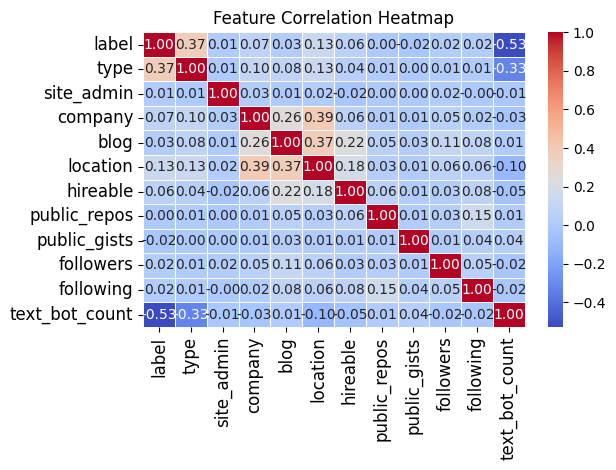

In [2]:
# 导入必要的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=14)
# 读取数据
data = pd.read_csv('./data/github_bot_processed_data.csv')

# 去除 'created_at' 和 'updated_at' 列
data = data.drop(['created_at', 'updated_at','bio'], axis=1)

# 将文本型数据转换为数值型数据
data['label'] = data['label'].apply(lambda x: 1 if x == 'Human' else 0)
data['site_admin'] = data['site_admin'].apply(lambda x: 1 if x else 0)
data['company'] = data['company'].apply(lambda x: 1 if x else 0)
data['blog'] = data['blog'].apply(lambda x: 1 if x else 0)
data['location'] = data['location'].apply(lambda x: 1 if x else 0)
data['hireable'] = data['hireable'].apply(lambda x: 1 if x else 0)

# 标准化处理
data['public_repos'] = (data['public_repos'] - np.mean(data['public_repos'])) / np.std(data['public_repos'])
data['public_gists'] = (data['public_gists'] - np.mean(data['public_gists'])) / np.std(data['public_gists'])
data['followers'] = (data['followers'] - np.mean(data['followers'])) / np.std(data['followers'])
data['following'] = (data['following'] - np.mean(data['following'])) / np.std(data['following'])



# 计算相关系数
corr = data.corr()
corr = corr[['label']]
corr = corr.drop('label')

# 取绝对值排序
corr = corr.apply(lambda x: abs(x))
corr = corr.sort_values('label', ascending=False)

# 输出结果
print('采用的特征提取法：相关系数法\n')
print('label最相关的几个特征:\n', corr.head())

# 绘制特征关系图
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.2f', xticklabels=1, yticklabels=1, linewidths=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## 创建衍生特征

创建衍生特征是指在原始数据的基础上，通过组合、变换、或者统计分析等方法创建新的特征，以更好的描述数据的特性，提高模型的预测性能。衍生特征的创建是机器学习和数据挖掘领域中非常重要的一个步骤，因为它可以使模型更好地利用数据中隐藏的信息，提高模型的精度和泛化能力。

创建衍生特征的算法如下：
1. 多项式特征：通过对原始特征进行幂次扩展，可以创建新的特征，这对于线性模型和核方法等算法很有用。

2. 对数变换：对数变换可以将非线性关系转化为线性关系，使原始特征更符合线性模型的假设。

3. 指数变换：指数变换可以增强某些特征的影响，从而使模型更能够关注这些特征。

4. 独热编码：独热编码将离散型的特征转化为连续型的特征，以便更好地在模型中使用。

5. 特征交叉：特征交叉通过组合多个特征来创建新的特征，以捕捉特征之间的非线性关系。

6. 特征降维：通过降维算法如PCA，可以将高维数据转换为低维数据，以便更好地进行可视化和建模。

7. 时间序列特征：对于时间序列数据，可以通过创建滞后特征、统计特征、周期性特征等方式来提取数据的时间特征，以便更好地进行分析和预测。

### 示例

在如下购物信息的数据集中，我们可以从已有的数据中创建哪些衍生特征呢？

| 用户ID | 年龄 | 性别 | 注册时间     | 最近登录时间       | 购物次数 | 购物总金额 | 平均购物金额 |
|--------|------|------|--------------|-------------------|---------|------------|--------------|
| 1      | 25   | 男   | 2022-01-05   | 2023-09-20 15:30 | 12      | 1200       | 100          |
| 2      | 32   | 女   | 2021-03-15   | 2023-09-21 10:15 | 30      | 4500       | 150          |
| 3      | 22   | 男   | 2022-06-10   | 2023-09-19 14:45 | 8       | 800        | 100          |
| 4      | 29   | 女   | 2022-02-20   | 2023-09-21 16:20 | 18      | 2100       | 116.67       |
| 5      | 35   | 男   | 2020-11-30   | 2023-09-18 11:00 | 45      | 5500       | 122.22       |
| 6      | 28   | 女   | 2021-09-05   | 2023-09-20 09:45 | 25      | 2800       | 112          |
| 7      | 40   | 男   | 2020-05-12   | 2023-09-20 17:30 | 60      | 7200       | 120          |
| 8      | 23   | 女   | 2022-08-18   | 2023-09-19 18:10 | 15      | 1500       | 100          |
| 9      | 31   | 男   | 2021-01-30   | 2023-09-20 14:00 | 22      | 2600       | 118.18       |
| 10     | 26   | 女   | 2022-04-22   | 2023-09-21 12:45 | 10      | 1200       | 120          |


以下是一些可能的衍生特征：

1. 账号活跃度特征：根据注册时间和最近登录时间，可以创建一个表示用户账号活跃度的特征，例如账号活跃天数、距今最后一次登录的天数等。

2. 购物时间特征：可以根据最近登录时间提取购物时间特征，例如购物时段（上午、下午、晚上）、工作日购物次数和周末购物次数等。

3. 年龄分段特征：将年龄分为不同的年龄段，例如青少年、成年人、中年人等，以便更好地分析不同年龄段用户的购物行为。

4. 购物金额分段特征：将购物总金额分为不同的金额段，例如低消费用户、中等消费用户和高消费用户，以进行用户分类和分析。


我们可以通过python代码在原有的数据上增扩内容：

In [3]:
import pandas as pd
from datetime import datetime

# 创建数据集
data = {
    '用户ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '年龄': [25, 32, 22, 29, 35, 28, 40, 23, 31, 26],
    '性别': ['男', '女', '男', '女', '男', '女', '男', '女', '男', '女'],
    '注册时间': ['2022-01-05', '2021-03-15', '2022-06-10', '2022-02-20', '2020-11-30',
                '2021-09-05', '2020-05-12', '2022-08-18', '2021-01-30', '2022-04-22'],
    '最近登录时间': ['2023-09-20 15:30', '2023-09-21 10:15', '2023-09-19 14:45', '2023-09-21 16:20',
                  '2023-09-18 11:00', '2023-09-20 09:45', '2023-09-20 17:30', '2023-09-19 18:10',
                  '2023-09-20 14:00', '2023-09-21 12:45'],
    '购物次数': [12, 30, 8, 18, 45, 25, 60, 15, 22, 10],
    '购物总金额': [1200, 4500, 800, 2100, 5500, 2800, 7200, 1500, 2600, 1200]
}

df = pd.DataFrame(data)

# 将日期时间字符串转换为日期时间对象
df['注册时间'] = pd.to_datetime(df['注册时间'])
df['最近登录时间'] = pd.to_datetime(df['最近登录时间'])

# 计算距今最后一次登录的天数和注册时间到最后一次登录历时多久
today = datetime.now()
df['距今最后登录天数'] = (today - df['最近登录时间']).dt.days
df['注册到最后登录历时'] = (df['最近登录时间'] - df['注册时间']).dt.days

# 打印结果
print(df)

   用户ID  年龄 性别       注册时间              最近登录时间  购物次数  购物总金额  距今最后登录天数  \
0     1  25  男 2022-01-05 2023-09-20 15:30:00    12   1200        76   
1     2  32  女 2021-03-15 2023-09-21 10:15:00    30   4500        75   
2     3  22  男 2022-06-10 2023-09-19 14:45:00     8    800        77   
3     4  29  女 2022-02-20 2023-09-21 16:20:00    18   2100        74   
4     5  35  男 2020-11-30 2023-09-18 11:00:00    45   5500        78   
5     6  28  女 2021-09-05 2023-09-20 09:45:00    25   2800        76   
6     7  40  男 2020-05-12 2023-09-20 17:30:00    60   7200        75   
7     8  23  女 2022-08-18 2023-09-19 18:10:00    15   1500        76   
8     9  31  男 2021-01-30 2023-09-20 14:00:00    22   2600        76   
9    10  26  女 2022-04-22 2023-09-21 12:45:00    10   1200        75   

   注册到最后登录历时  
0        623  
1        920  
2        466  
3        578  
4       1022  
5        745  
6       1226  
7        397  
8        963  
9        517  


### 练习

以下数据集包含了房屋的各种特征，包括房屋面积、卧室数量、浴室数量、车库面积、地下室面积、建筑年份、房屋类型、社区质量评分和销售价格。

| square_feet | bedrooms | bathrooms | garage_area | basement_area | year_built | house_type      | neighborhood_quality | sale_price |
|-------------|----------|-----------|-------------|---------------|------------|-----------------|----------------------|------------|
| 2000        | 3        | 2         | 400         | 600           | 1995       | Single Family  | 8                    | 250000     |
| 1600        | 2        | 1         | 250         | 500           | 1980       | Apartment      | 6                    | 150000     |
| 2200        | 4        | 3         | 500         | 800           | 2005       | Single Family  | 9                    | 350000     |
| 1800        | 3        | 2         | 350         | 550           | 1990       | Townhouse      | 7                    | 200000     |
| 2400        | 4        | 3         | 450         | 700           | 2010       | Single Family  | 8                    | 400000     |

请首先分析数据集，可以基于数据集创建哪些衍生特征，并用python代码实现(数据集存放于`./data/feature_engineering_2.csv`)


## 特征降维

特征降维是一种减少数据维度的技术，通过保留数据中的主要信息，降低计算复杂度和噪声影响，从而提高数据分析的效率和准确性。

主要的特征降维方法包括：

1. 主成分分析（PCA）： PCA是一种常用的无监督降维方法，它通过线性变换将原始特征投影到一组新的正交特征上，这些新特征被称为主成分。主成分通常按照方差的大小降序排列，因此可以选择最重要的主成分来实现降维。

2. 线性判别分析（LDA）： LDA是一种有监督的降维方法，它试图在降维的同时，最大化不同类别之间的差异，从而提高分类性能。

### 主成分分析

<br></br>
<img width="825" alt="image" src="https://github.com/hypertrons/hypertrons-crx/assets/50283262/b6427a30-bed5-4b7e-99c4-f0aaf8fe62ae">

<br></br>
<img width="751" alt="image" src="https://github.com/hypertrons/hypertrons-crx/assets/50283262/a3a77467-2c41-4764-a4ff-f9d4eca4d241">
<img width="757" alt="image" src="https://github.com/hypertrons/hypertrons-crx/assets/50283262/2e872010-e43a-45cf-a3f2-feb230a8cfd9">

#### 如何理解主成分分析

假设你是一名厨师，你经营一家餐馆，并在菜单上提供各种不同的菜肴。你记录了每道菜肴的成分，包括主要食材的种类和数量。现在，你想要了解如何将这些菜肴区分开来，以便更好地组织你的菜单。

这里的每道菜肴可以看作是一个数据点，而菜肴中的每种成分可以看作是一个特征。但是，你的菜单可能有很多不同的特征，这使得很难理解哪些特征最重要，哪些特征可以忽略，以便更好地理解菜肴之间的差异。

这就是主成分分析派上用场的地方。你可以将主成分分析应用于你的菜肴数据集，以找到一组新的特征（主成分），这些新特征是原始特征的线性组合，但是它们按照方差的大小降序排列。

在这个情景下，主成分可能对应于某种食材的组合或某种烹饪方式。例如，第一个主成分可能主要与肉类相关，第二个主成分可能主要与蔬菜相关，第三个主成分可能与香料相关。通过这种方式，你可以看到哪些主成分最能区分不同的菜肴，哪些主成分包含了最多的信息，以及哪些主成分可以用来简化菜单。

通过主成分分析，你可以更好地理解你的菜肴，以便更好地满足顾客的口味，组织菜单，或者甚至开发新的创意菜肴。这个例子说明了主成分分析在降维和理解复杂数据集方面的应用，它可以帮助你从多个特征中提取出最重要的信息。

#### 步骤

1. 计算数据集的协方差矩阵。
2. 计算协方差矩阵的特征值和特征向量。
3. 选择前k个最大特征值对应的特征向量。
4. 将原始数据投影到这k个特征向量构建的新空间中。

#### 示例


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

##### 数据获取

In [5]:
# 读取数据（）
df_wine = pd.read_csv('./data/wine.data',header=None)

该数据集是UCI的公开数据集，是对意大利同一地区种植的葡萄酒进行分析的结果，数据集共14列数据，第一个属性是类标识符，分别是1/2/3来表示，代表葡萄酒的三个分类。剩余的13个属性是，酒精、苹果酸、灰、灰分的碱度、镁、总酚、黄酮类化合物、非黄烷类酚类、原花色素、颜色强度、色调等。

In [6]:
# 设置列索引
df_wine.columns =  ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [7]:
# 数据维度
df_wine.shape

(178, 14)

In [8]:
# 每一类数据包含的样本个数
df_wine['Class label'].value_counts()

Class label
2    71
1    59
3    48
Name: count, dtype: int64

In [9]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##### 数据集划分

In [10]:
# 数据集设置：X为样本特征数据，y为目标数据，即标注结果
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [11]:
# 数据集划分： 将数据集划分为训练集和测试集数据（测试集数据为30%，训练集为70%）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

##### 数据标准化

In [12]:
# 实例化
sc = StandardScaler()

In [13]:
# 对数据集进行标准化（一般情况下我们在训练集中进行均值和方差的计算，直接在测试集中使用）
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

##### 使用sklearn实现PCA

sklearn中提供了进行PCA的API

##### 特征值计算

In [14]:
# 实例化pca，保留所有特征
pca = PCA()

In [15]:
# 特征提取
X_train_pca = pca.fit_transform(X_train_std)
# 特征值结果
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

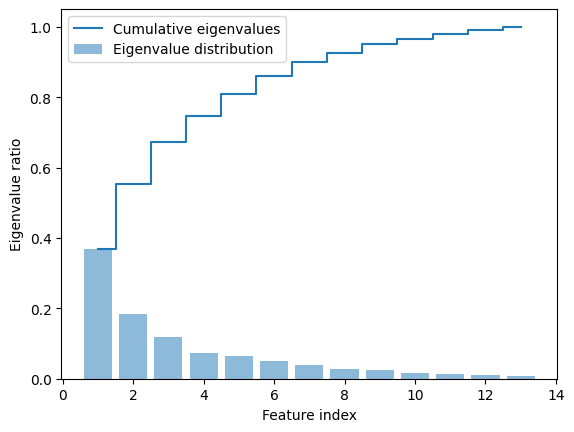

In [16]:
# 特征值绘制
# 绘制图像
plt.figure()
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='Eigenvalue distribution') # 特征值分布
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='Cumulative eigenvalues') # 累计特征值分布
plt.ylabel('Eigenvalue ratio') # 特征值比例
plt.xlabel('Feature index') # 特征索引
plt.legend(loc='best')

##### 特征降维

In [17]:
# 压缩到二维特征
pca = PCA(n_components=2)

In [18]:
# 对训练数据进行处理
X_train_pca = pca.fit_transform(X_train_std)

In [19]:
# 特征值结果(只保留两个特征)
print(pca.explained_variance_ratio_)

[0.36951469 0.18434927]


In [20]:
# 对测试集数据进行处理
X_test_pca = pca.transform(X_test_std)

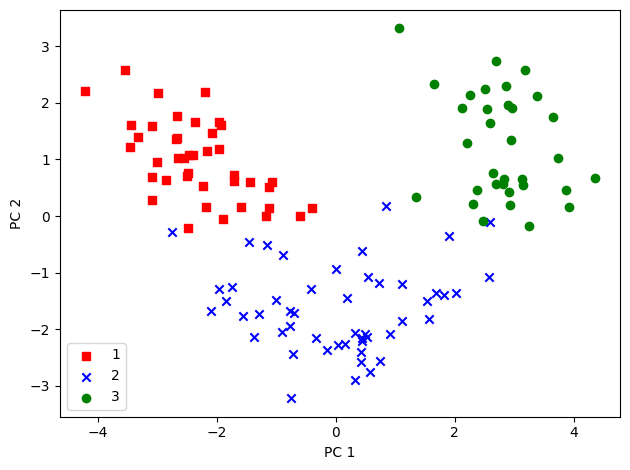

In [21]:
# 特征降维后结果展示
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    # 按照样本的真实值进行展示
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### 机器人判别实例

In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# 加载数据集
data = pd.read_csv('./data/github_bot_processed_data.csv')

# 去除 'created_at' 和 'updated_at' 列
data = data.drop(['created_at', 'updated_at', 'bio'], axis=1)

# 提取特征列
X = data.iloc[:, 1:-1]  # Assuming the first column is not a feature

# 标准化数据
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# 创建PCA模型
pca = PCA()

# 拟合PCA模型到数据
pca.fit(X_standardized)

# 获取主成分
principal_components = pca.components_

# 获取方差解释比例
explained_variance_ratio = pca.explained_variance_ratio_

# 将主成分和方差解释比例放入DataFrame
df = pd.DataFrame({'主成分': range(1, len(explained_variance_ratio) + 1),
                   '方差解释比例': explained_variance_ratio})

# 打印DataFrame
print(df)

# 打印主成分和方差解释比例
print("主成分:")
print(principal_components)
print("\n方差解释比例:")
print(explained_variance_ratio)

   主成分    方差解释比例
0    1  0.186365
1    2  0.116365
2    3  0.102084
3    4  0.099441
4    5  0.097950
5    6  0.095763
6    7  0.091941
7    8  0.084837
8    9  0.068218
9   10  0.057037
主成分:
[[ 0.20667964  0.03286587  0.46810432  0.51789982  0.5546024   0.31252552
   0.11352581  0.04553572  0.15802858  0.15385322]
 [-0.14774743 -0.08314038 -0.27429477 -0.00791718 -0.17666358  0.20961577
   0.61160419  0.17939546  0.15492727  0.62495153]
 [-0.0319252   0.7956145   0.07233319 -0.04335361 -0.03439498 -0.33124371
   0.03756064  0.12774474  0.47824626  0.03888831]
 [-0.01356441 -0.12550599  0.01948564  0.02433842 -0.0017226  -0.0498216
  -0.19934888  0.96589247 -0.0648759  -0.06090908]
 [-0.63679881 -0.24957103 -0.09017215  0.18044859 -0.01697728  0.19794057
  -0.28492735 -0.06209073  0.58902814 -0.14158798]
 [ 0.54659362 -0.47965933  0.02907542 -0.09925131 -0.06837561 -0.36973628
   0.03607451 -0.02577991  0.56295661  0.01413775]
 [-0.4749485  -0.2249271   0.44144017 -0.04047138  0.175516

##### 结果分析

在PCA（Principal Component Analysis）分析中，我们通过降维的方式来减少数据的维度，从而更好地理解数据和减少冗余信息。这个结果包含了主成分和方差解释比例，这是PCA分析的重要输出。

- 主成分（Principal Components）：这是新的特征向量，其组合可以解释数据中的方差。在结果中，主成分由 0 到 9 编号。每个主成分是原始特征的线性组合，可以看作是一种新的特征。主成分是按照方差解释比例的降序排列的，这意味着第一个主成分解释了最多的方差，第二个主成分解释了次多的方差，以此类推。

- 方差解释比例（Explained Variance Ratio）：这是每个主成分所解释的方差占总方差的比例。在结果中，方差解释比例由高到低排列，每个比例表示相应主成分解释的方差百分比。例如，第一个主成分解释了约 18.64% 的总方差，第二个主成分解释了约 11.64% 的总方差，以此类推。

通常情况下，我们可以选择保留一部分主成分，以解释大部分数据的方差，同时减少数据维度。这使得数据更易于可视化和建模，同时减少噪音和冗余信息的影响。在数据中，可以看到前几个主成分（通常是前两到三个）解释了大部分的方差，而后续主成分的方差解释比例较小。

方差解释比例可以用来确定保留多少主成分以满足你的分析需求。通常，选择总方差解释比例达到某个阈值（如90%或95%）的主成分数量。这个选择可能因特定的问题和数据而有所不同。通过保留较少的主成分，你可以降低维度，同时仍然保留了大部分的数据方差。

### 线性判别分析

线性判别分析（LDA）是一种监督学习算法，主要用于降维、特征提取和分类任务。LDA的核心思想是通过线性变换将原始高维数据映射到低维空间，同时使不同类别之间的距离最大化，同类别之间的距离最小化。

LDA涉及以下几个步骤：

1. 计算每个类别的均值向量。
2. 计算类内散度矩阵。
3. 计算类间散度矩阵。
4. 计算类内散度矩阵的逆和类间散度矩阵之积的特征值和特征向量。
5. 选择前k个最大特征值对应的特征向量，构成一个pxk的矩阵W。
6. 将原始数据投影到这k特征向量构建的新空间中。

#### 示例

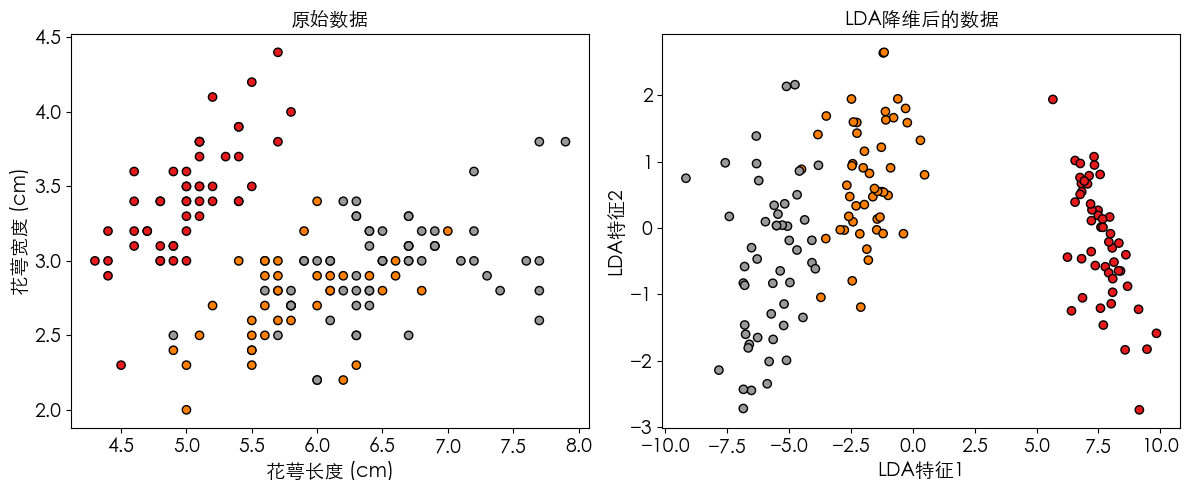

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 加载鸢尾花数据集
iris = load_iris()

# 使用线性判别分析（LDA）对数据进行降维
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(iris.data, iris.target)

# 设置中文字体
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=14)

# 绘制原始数据散点图
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('花萼长度 (cm)', fontproperties=font)
plt.ylabel('花萼宽度 (cm)', fontproperties=font)
plt.title('原始数据', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.tight_layout()

# 绘制LDA降维后的散点图
plt.subplot(122)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=iris.target, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('LDA特征1', fontproperties=font)
plt.ylabel('LDA特征2', fontproperties=font)
plt.title('LDA降维后的数据', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.tight_layout()

plt.show()


从图中可以看出，经过线性判别分析后，数据之间的界限更明显了

## 实验案例：机器人数据特征工程


通过 bot 数据集分析和演示主成分分析（PCA）的过程。

数据集在`./data/github_bot_processed_data.csv`

通过github API可以得到很多数据，目前的数据集如下所示（仅展示三行）：

| actor_id | login      | name        | email | type  | location        | bio                                       | public_repos | public_gists | followers | following | tfidf_similarity | cosin_similarity | count | issue_num | pr_num | repo_num | commit_num | activity_day | lag | acf | spend     | response_time | label | mix | jaccard_similarity |
|----------|------------|-------------|-------|-------|-----------------|-------------------------------------------|--------------|--------------|-----------|-----------|-----------------|-----------------|-------|-----------|--------|----------|------------|--------------|-----|-----|-----------|---------------|-------|-----|---------------------|
| 0        | 1081405    | dlazesz     | 0     | User  | 0               | 0                                         | 25           | 1            | 4         | 1         | 0.019702907     | 0.044808587     | 134459| 85        | 56     | 84       | 134209     | 246          | 2   | 0.967935562| 4         | 24359.42553   | Human |     | 0.0102251972128146|
| 1        | 13100598   | sarkiroka   | 0     | User  | 0               | "I just press the buttons randomly...     | 30           | 1            | 8         | 6         | 0.0             | 0.0             | 25035 | 21        | 11     | 4        | 24999      | 339          | 2   | 0.962912647| 3         | 1566.5        | Human |     | 0.0047602227985638|
| 2        | 22494      | ZoomQuiet   | 0     | User  | ZhuHai,China,Earth | "Time is unimportant, only life important." | 103          | 49           | 1198      | 216       | 0.0             | 0.0             | 12351 | 51        | 4      | 165      | 12131      | 358          | 2   | 0.961636247| 3         | 20805.77778  | Human |     | 0.0026837250260225|


这个数据集里包含了很多的字段，每个字段都有相应的意义，且根据不同内涵，应当采取不同的模型处理。比如在bio栏里说明了用户的个性签名信息，这种文本数据适用于自然语言处理的模型。或者followers和following栏可以体现用户的社交网络信息。

对于分类问题，我们希望简化特征数量，将特征缩小到type,site_admin,company,blog,location,hireable,public_repos,public_gists,followers,following,text_bot_count范围内。

可以通过以下代码过滤特征信息：

In [24]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# 从CSV文件中读取数据
df = pd.read_csv('./data/github_bot_processed_data.csv')  

# 去除 'created_at' 和 'updated_at' 列还有'bio'列
df = df.drop(['created_at', 'updated_at','bio'], axis=1)

# 输出数据的基本信息
print("Original Data Information:")
print(df.info())

# 标签编码
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# 使用卡方检验选择K个最佳特征
X = df.drop('label', axis=1)
y = df['label']
best_features = SelectKBest(score_func=chi2, k=5)
X_best = best_features.fit_transform(X, y)

# 打印选择的最佳特征
selected_features = X.columns[best_features.get_support()]
print("Selected Features:")
print(selected_features)

# 使用PCA进行降维
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 打印PCA降维后的特征
print("PCA Reduced Features:")
print(X_pca)

# 将选择的特征或降维后的特征添加到DataFrame
df['selected_feature_1'] = X_best[:, 0]
df['selected_feature_2'] = X_best[:, 1]
df['selected_feature_3'] = X_best[:, 2]

df['PCA_component_1'] = X_pca[:, 0]
df['PCA_component_2'] = X_pca[:, 1]
df['PCA_component_3'] = X_pca[:, 2]

# 输出最终数据的信息
print("Final Data Information:")
print(df.info())

# 保存最终数据到新的CSV文件
df.to_csv('./data/github_bot_feature_data.csv', index=False)  # 将数据保存到 'final_data.csv'

print("Final data saved to 'github_bot_feature_final_data.csv'")



Original Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   public_repos    19768 non-null  int64 
 8   public_gists    19768 non-null  int64 
 9   followers       19768 non-null  int64 
 10  following       19768 non-null  int64 
 11  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(1)
memory usage: 1.0+ MB
None
Selected Features:
Index(['location', 'public_gists', 'followers', 'following', 'text_bot_count'], dtype='object')
PCA Reduced Features:
[[-241.8889796   -29.04113274  -58.04829525]
 [

### 结果分析

当进行特征工程时，通常会选择最相关的特征来用于后续的分析或建模，以减少数据的维度和提高模型性能。

1. **Selected Features (被选择的特征)**:
   - "Selected Features" 部分显示了在卡方检验中选择的最佳特征的列名称。卡方检验用于衡量特征与标签之间的相关性，以确定哪些特征对目标变量的影响更大。
   - 在示例中，被选择的最佳特征包括 'location', 'public_gists', 'followers', 'following', 和 'text_bot_count'。这表示这些特征与标签(label)之间的关联性较高，可能对最终的分类或预测任务有重要影响。

2. **PCA Reduced Features (PCA降维后的特征)**:
   - "PCA Reduced Features" 部分展示了主成分分析（PCA）降维后的数据，其中包括三个主成分。PCA是一种降维技术，它将原始数据转换成一组新的特征，称为主成分，以减少数据的维度。
   - 在示例中，每个样本在三个主成分上的投影值都被列出。这三个主成分是PCA过程中自动确定的，它们是原始特征的线性组合，旨在保留尽可能多的数据方差。
   - PCA降维可以帮助减少数据的复杂性，提高计算效率，并消除特征之间的多重共线性，但可能会损失一些信息。通常，PCA主成分的解释性较差，不容易直接解释其含义，但它们可以在后续的建模过程中用于减少维度。

这两种特征选择和降维的方法可以根据具体问题的需求来选择。"Selected Features" 是直接选择原始特征中与标签关联性较高的部分，而 "PCA Reduced Features" 是通过数学变换创建的新特征，用于减少维度和处理多维数据。